<a href="https://colab.research.google.com/github/min03027/24-2-data-science-applications/blob/main/Chapter_04_Dimension_reduction_st_min_1003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4: 차원축소

- 차원축소 = 요인 선택 = 특징 추출

- 모델의 차원
: 사용한 예측변수나 입력변수의 개수

[ 차원 축소 방법 ]
1. 범주를 제거하거나 결합하기
2. 데이터 요약을 통해 변수 간 중복정보를 검출, 불필요한 변수및 범주 합치기
3. 범주형 변수 > 수치형 변수
4. 주성분 분석 같은 자동화 된 차원 축소 기술 사용

In [2]:
pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 65.2 MB/s eta 0:00:00


In [43]:
from pathlib import Path
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
# 주성분 분석(PCA)과 데이터 전처리를 수행하는데 필요한 모듈을 가져오는 것
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
# 데이터 전처리와 스케일링과 같은 데이터 준비 작업을 수행하는 데 사용, 데이터를 정규화하거나 표준화하는 등의 작업을 수행

import matplotlib.pylab as plt

import dmba

%matplotlib inline


## 예제1 : 보스턴 주택가격


- 스턴 주택 데이터셋의 변수 설명

 [01]  CRIM
자치시(town) 별 1인당 범죄율

 [02]  ZN
25,000 평방피트를 초과하는 거주지역의 비율

 [03]  INDUS
비소매상업지역이 점유하고 있는 토지의 비율

 [04]  CHAS
찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)

 [05]  NOX
10ppm 당 농축 일산화질소

 [06]  RM
주택 1가구당 평균 방의 개수

 [07]  AGE
1940년 이전에 건축된 소유주택의 비율

 [08]  DIS
5개의 보스턴 직업센터까지의 접근성 지수

 [09]  RAD
방사형 도로까지의 접근성 지수

 [10]  TAX
10,000 달러 당 재산세율

 [11]  PTRATIO
자치시(town)별 학생/교사 비율

 [12]  B
1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.

 [13]  LSTAT
모집단의 하위계층의 비율(%)

 [14]  MEDV
본인 소유의 주택가격(중앙값) (단위: $1,000)

In [4]:
bostonHousing_df = dmba.load_data('BostonHousing.csv')
bostonHousing_df = bostonHousing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
bostonHousing_df.head(9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


In [10]:
#round(2)소수점 둘째 자리까지 반올림하는 작업
bostonHousing_df.describe().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV,RM_bin
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,12.653,22.533,0.166,5.775
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,7.141,9.197,0.372,0.781
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,1.730,5.000,0.000,3.000
25%,0.082,0.000,5.190,0.000,0.449,5.885,45.025,2.100,4.000,279.000,17.400,6.950,17.025,0.000,5.000
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,11.360,21.200,0.000,6.000
75%,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,16.955,25.000,0.000,6.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,37.970,50.000,1.000,8.000


In [5]:
#  DataFrame의 수치형 데이터에 대한 기본 통계 정보를 제공
bostonHousing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


Compute mean, standard deviation, min, max, median, length, and missing values of CRIM

In [ ]:
print('Mean : ', bostonHousing_df.CRIM.mean())
print('Std. dev : ', bostonHousing_df.CRIM.std())
print('Min : ', bostonHousing_df.CRIM.min())
print('Max : ', bostonHousing_df.CRIM.max())
print('Median : ', bostonHousing_df.CRIM.median())
print('Length : ', len(bostonHousing_df.CRIM))

print('Number of missing values : ', bostonHousing_df.CRIM.isnull().sum())

Mean :  3.613523557312254
Std. dev :  8.60154510533249
Min :  0.00632
Max :  88.9762
Median :  0.25651
Length :  506
Number of missing values :  0


Compute mean, standard dev., min, max, median, length, and missing values for all variables

In [ ]:
pd.DataFrame({'mean': bostonHousing_df.mean(),
              'sd': bostonHousing_df.std(),
              'min': bostonHousing_df.min(),
              'max': bostonHousing_df.max(),
              'median': bostonHousing_df.median(),
              'length': len(bostonHousing_df),
              'miss.val': bostonHousing_df.isnull().sum(),
             })

,mean,sd,min,max,median,length,miss.val
CRIM,3.613524,8.601545,0.00632,88.9762,0.25651,506,0
ZN,11.363636,23.322453,0.00000,100.0000,0.00000,506,0
INDUS,11.136779,6.860353,0.46000,27.7400,9.69000,506,0
CHAS,0.069170,0.253994,0.00000,1.0000,0.00000,506,0
NOX,0.554695,0.115878,0.38500,0.8710,0.53800,506,0
RM,6.284634,0.702617,3.56100,8.7800,6.20850,506,0
AGE,68.574901,28.148861,2.90000,100.0000,77.50000,506,0
DIS,3.795043,2.105710,1.12960,12.1265,3.20745,506,0
RAD,9.549407,8.707259,1.00000,24.0000,5.00000,506,0
TAX,408.237154,168.537116,187.00000,711.0000,330.00000,506,0


## 상관계수 표와 히트맵을 사용한 시각화
상관계수 : 두 변수 사이의 통계적 관계를 표현하기 위해 특정한 상관관계의 정도를 수치적으로 나타낸 계수

- 변수의 중복 탐지에 좋음
- 강한 상관관계의 변수는? **다중공산성** 문제 발생 가능
- 히트맵을 통해 상관관계 변수들을 쉽게 식별 가능

> 다중공산성 문제 : 결과변수와 같은 선형관계를 공유하는 예측변수가 2개 이상 있는 상태

In [11]:
#round(2)소수점 둘째 자리까지 반올림하는 작업
bostonHousing_df.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV,RM_bin
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39,-0.15,-0.22
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36,0.37,0.27
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48,-0.37,-0.36
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18,0.11,0.07
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43,-0.23,-0.26
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70,0.64,0.92
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38,-0.19,-0.20
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25,0.12,0.18
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38,-0.20,-0.19
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47,-0.27,-0.26


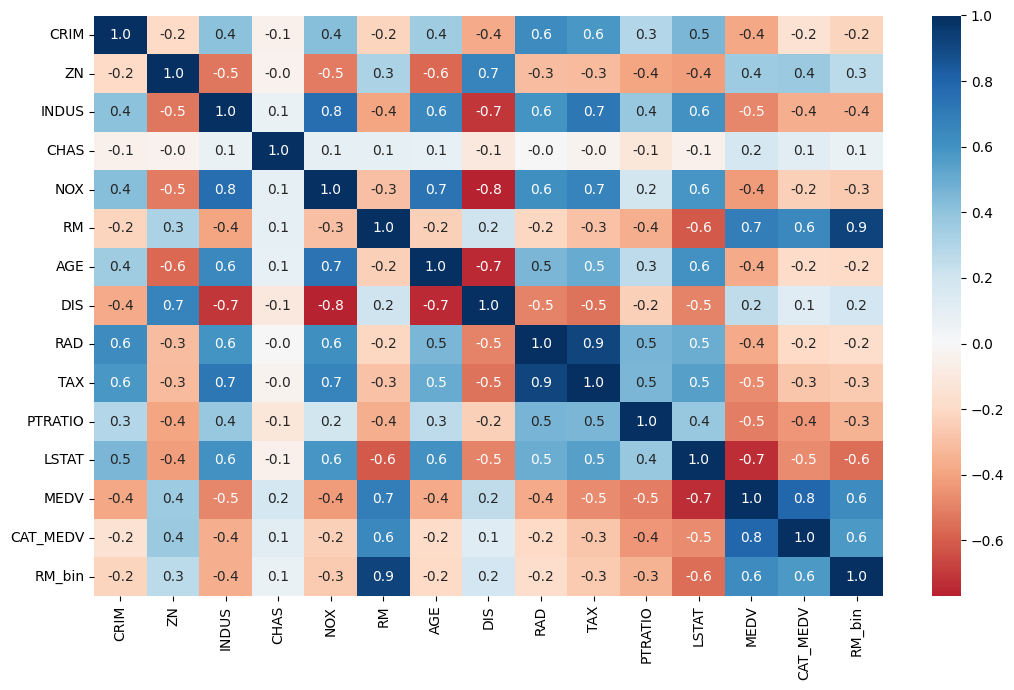

In [12]:
import seaborn as sns

corr = bostonHousing_df.corr()

fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

# annot=True: 각 셀에 값을 표시할지 여부를 나타냄. True로 설정하면 값을 표시
# fmt=".1f": 값의 표시 형식을 지정. 여기서는 소수 첫째 자리까지 표시

# cmap="RdBu": 색상 맵을 "RdBu"로 설정. 이 색상 맵은 양의 상관 관계에는 빨간색을, 음의 상관 관계에는 파란색을 사용하여 표시.
# center=0: 색상 맵의 중심 값을 0으로 설정. 이를 통해 중립적인 상관 관계 값을 강조.
# ax=ax: 앞에서 생성한 서브플롯 ax를 사용하여 그래프를 그림.

plt.tight_layout()
plt.show()

## 취합과 피벗 테이블
- value_counts() : 특정 열의 고유 값들이 각각 몇번 나타나는지를 계산

In [6]:
# CHAS 열에 대한 데이터 값을 카운팅
# 찰스강 인접 여부
# 0 : 인접하지 않음
# 1 : 찰스강에 인접
bostonHousing_df.CHAS.value_counts()

,count
CHAS,
0,471
1,35


## Table 4.6
Create bins of size 1 for variable using the method `pd.cut`. By default, the method creates a categorical variable, e.g. `(6,7]`. The argument `labels=False` determines integers instead, e.g. `6`.
/ Pandas의 pd.cut 메서드를 사용하여 변수에 대한 크기 1의 구간(bin)을 만들려면 다음 단계를 따를 수 있습니다.

기본 설정으로 이 메서드는 범주형 변수를 생성합니다(예: (6, 7]). labels=False 인자를 사용하면 정수 대신에 범주형 변수 대신 정수를 생성합니다(예: 6).

## 1.연속형 변수를 범주형 변수로 변환
 - RM(주택 내 방 개수)를 연속형 변수에서 **구간화(binning)**를 통해 범주형 변수로 변환

 => 차원의 복잡성을 줄이는 과정  

In [13]:
#  RM 열의 값을 0에서 10 사이의 범위로 나누어 각 구간에 해당하는 값으로 변환
bostonHousing_df['RM_bin'] = pd.cut(bostonHousing_df.RM, range(0, 10), labels=False)
bostonHousing_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV,RM_bin
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0,6
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0,6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1,7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1,6
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1,7


'RM'과 'CHAS'를 기준으로 그룹화하고, 그룹화된 데이터를 사용하여 'MEDV'의 평균을 계산

Compute the average of MEDV by (binned) RM and CHAS. First group the data frame using the `groupby` method, then restrict the analysis to MEDV and determine the mean for each group.

## 2.groupby를 이용한 데이터 결합
 - groupby(['RM_bin', 'CHAS']) :
RM_bin(구간화된 방 개수)과 CHAS(찰스 강 인접여부)라는 두 변수를 기준으로 데이터를 그룹화

- 각각의 RM_bin (구간화된 방 개수)와 CHAS (Charles River 인근 여부)에 대해 주택 가격의 평균을 계산

In [ ]:
bostonHousing_df.groupby(['RM_bin', 'CHAS'])['MEDV'].mean()

RM_bin  CHAS
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: MEDV, dtype: float64

## 4.데이터 요약을 통한 데이터 패턴생성 및 복잡성 감소

- **데이터를 긴 형식으로 변환** : 분석 유리. 시각화 유리
- 여러 개의 주택 가격 변수(MEDV1, MEDV2 등)를 하나의 변수(value)로 통합하여 데이터 구조를 단순화


In [17]:
bostonHousing_df = dmba.load_data('BostonHousing.csv')
bostonHousing_df = bostonHousing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'}) # 컬럼명 변경
bostonHousing_df['RM_bin'] = pd.cut(bostonHousing_df.RM, range(0, 10), labels=False) # 범주화
bostonHousing_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV,RM_bin
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0,6
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0,6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1,7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1,6
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1,7


In [18]:
#melt 함수를 사용하여 데이터프레임을 재구성하는 작업을 수행 / 긴형식으로 변환
mlt = pd.melt(bostonHousing_df, id_vars=['RM_bin', 'CHAS'],
              value_vars=['MEDV'])
mlt.head()

,RM_bin,CHAS,variable,value
0,6,0,MEDV,24.0
1,6,0,MEDV,21.6
2,7,0,MEDV,34.7
3,6,0,MEDV,33.4
4,7,0,MEDV,36.2


### [피벗 테이블]
: 찰스강 인접도와 / 방의 개수를 통해 주택가격의 평균값 계산

In [21]:
pd.pivot_table(bostonHousing_df, values='MEDV', index=['RM_bin'], columns=['CHAS'], aggfunc=np.mean, margins=True)

<ipython-input-21-19290be3b277>:1: FutureWarning: The provided callable <function mean at 0x78cdc953c280> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(bostonHousing_df, values='MEDV', index=['RM_bin'], columns=['CHAS'], aggfunc=np.mean, margins=True)
<ipython-input-21-19290be3b277>:1: FutureWarning: The provided callable <function mean at 0x78cdc953c280> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(bostonHousing_df, values='MEDV', index=['RM_bin'], columns=['CHAS'], aggfunc=np.mean, margins=True)
<ipython-input-21-19290be3b277>:1: FutureWarning: The provided callable <function mean at 0x78cdc953c280> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable wil

CHAS,0,1,All
RM_bin,,,
3,25.300000,NaN,25.300000
4,15.407143,NaN,15.407143
5,17.200000,22.218182,17.551592
6,21.769170,25.918750,22.015985
7,35.964444,44.066667,36.917647
8,45.700000,35.950000,44.200000
All,22.093843,28.440000,22.532806


## 5.범주형 변수의 범주 개수 축소

- **pd.crosstab()**
 두변수 간의 관계를 나타내는 교차표를 생성, 여기서는** 주택 가격 범주(CAT_MEDV)**와 **주거용 토지 비율(ZN)**의 빈도를 계산.

- 각 주택가격과 해당 범주에속하는 주거용 토지 비율의 조합에 대한 빈도 포함

- 생성된 교차표를 각 범주에 대한 비율로 변환


In [23]:
tbl = pd.crosstab(bostonHousing_df.CAT_MEDV, bostonHousing_df.ZN)
propTbl = tbl / tbl.sum() #tbl 테이블의 각 셀의 값을 해당 열의 합계로 나누어 백분율로 변환
propTbl.round(2)

ZN,0.0,12.5,17.5,18.0,20.0,21.0,22.0,25.0,28.0,30.0,...,55.0,60.0,70.0,75.0,80.0,82.5,85.0,90.0,95.0,100.0
CAT_MEDV,,,,,,,,,,,,,,,,,,,,,
0,0.91,1.0,0.0,1.0,0.24,1.0,0.9,1.0,1.0,1.0,...,0.67,0.75,1.0,0.33,0.67,0.5,1.0,0.0,0.0,0.0
1,0.09,0.0,1.0,0.0,0.76,0.0,0.1,0.0,0.0,0.0,...,0.33,0.25,0.0,0.67,0.33,0.5,0.0,1.0,1.0,1.0


<ipython-input-26-65738d0e0775>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


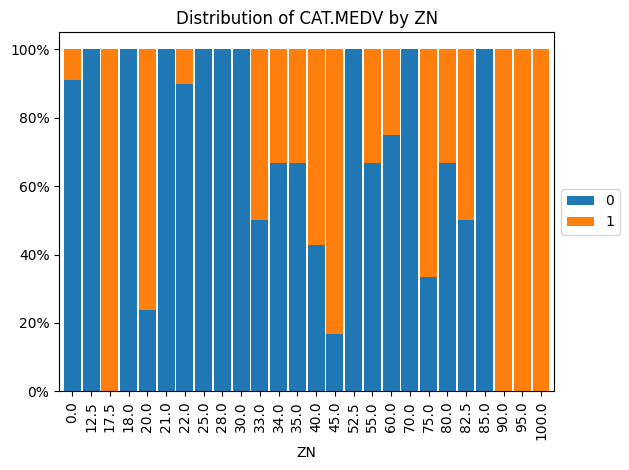

In [26]:
# 두 변수 간의 관계를 시각적으로 나타내는 막대 그래프를 생성하고 백분율로 표시
ax = propTbl.transpose().plot(kind='bar', stacked=True, width=0.9)
# propTbl.transpose()는 백분율 교차 탭을 전치하여 열과 행을 바꾸어줌

# plot(kind='bar', stacked=True, width=0.9)는 막대 그래프를 생성
# stacked=True로 설정하면 각 열의 값을 쌓아서 표시하고, width=0.9로 설정하면 막대 너비를 좁게하고 그 결과를 ax 변수에 할당

ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
# ax.get_yticks()로 y축의 눈금값을 가져온 다음, '{:,.0%}'.format(x) 형식을 사용하여 각 값을 백분율 형식으로 포맷팅

plt.title('Distribution of CAT.MEDV by ZN')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

## 주성분 분석 (PCA, Principal Component Analysis)


- **PCA(주성분 분석, Principal Component Analysis)**은


 고차원 데이터를 저차원으로 축소하여 주요 정보를 요약하는 기법입니다. 데이터를 설명하는 여러 변수들 중에서 상관관계가 높은 변수를 새로운 축으로 변환해, 데이터의 분산을 가장 잘 설명하는 새로운 성분(주성분)을 찾습니다. 이렇게 하면 원래 변수들 간의 상관관계를 제거하고, 더 적은 차원에서 중요한 정보를 보존할 수 있습니다.

[PCA의 주요 개념]

1. **차원 축소**
: 다수의 변수를 줄여 더 적은 수의 변수를 사용해 데이터 구조를 설명하려고 합니다. 예를 들어, 100차원의 데이터에서 2개의 주성분만을 뽑아 데이터를 시각화하거나 분석하는 것이 가능합니다.

2. **주성분(Principal Components):**
데이터를 새로운 좌표계로 변환할 때 가장 많은 분산을 설명하는 축을 찾습니다. 첫 번째 주성분은 데이터의 분산을 가장 많이 설명하는 축이고, 두 번째 주성분은 그다음으로 많은 분산을 설명하는 축입니다.

3. **분산과 공분산:**
PCA는 데이터의 분산이 큰 방향을 찾기 때문에, 분산이 큰 주성분일수록 데이터의 중요한 특징을 잘 설명한다고 봅니다.

4. **데이터 변환:**
원본 데이터는 주성분으로 변환되며, 이 변환된 좌표계에서는 주성분들이 서로 직교(상호 독립적)하게 됩니다.

In [27]:
cereals_df = dmba.load_data('Cereals.csv')
pcs = PCA(n_components=2) #PCA를 사용하여 주성분을 2개만 추출

pcs.fit(cereals_df[['calories', 'rating']])
# PCA 모델을 cereals_df 데이터프레임의 'calories'와 'rating' 열에 대해 학습
# 이렇게 함으로써 PCA는 데이터의 주성분을 추출하고 주어진 데이터를 새로운 공간으로 변환

PCA(n_components=2)

###1.두변수의 공분산 구하기
:손실을 최소화 하면서

- **상관관계** : 0~1 까지의 값을 가짐

- **공분산** : 얼마나 음양의 값으로 크냐~ 를 볼 수 있음 (역의 관계와 양의 관계)

In [28]:

# Cereal data 불러오기
cereals_df = dmba.load_data('Cereals.csv')

# PCA 적용: 'calories'와 'rating' 변수만 사용
pcs = PCA(n_components=2)
pcs.fit(cereals_df[['calories', 'rating']])

# PCA로 변환된 두 성분을 확인
transformed_data = pcs.transform(cereals_df[['calories', 'rating']])

# 두 성분 간의 분산(공분산 행렬)을 계산
cov_matrix = np.cov(transformed_data.T)

# 결과 출력
print("공분산 행렬:\n", cov_matrix)


공분산 행렬:
 [[4.98024478e+02 6.12258719e-13]
 [6.12258719e-13 7.89327388e+01]]


In [ ]:
# 피어슨 상관계수 계산
correlation = cereals_df['calories'].corr(cereals_df['rating'])

print("칼로리와 평가점수 간의 상관계수:", correlation)

칼로리와 평가점수 간의 상관계수: -0.6893760311652586


두 변수의 **전체 변동 중 대략 69%가 실질적으로 두 변수가 공유하는 변동**으로, 한 변수의 변동이 다른 변수에서 나타난 유사한 변동으로 **중복**되었다고 할 수 있다.

PCA의 개념은 비록 2개의 변수에 있는 정보를 모두 포함하지 못하더라도 대부분은 포함될 수 있는 두 변수의 선형결합을 찾는 것.

두 변수에 있는 **정보란 두 변수의 변동**을 의미함.

Q 77개 시리얼 중 가장 큰 변동을 설명하는 것은 무엇인가?
- 칼로리와 평점 두 변수만을 대상으로 설명해보자.
- 총변동은 두 변수의 분산의 합
- 379.63+197.32=577

- 칼로리 총변동은 379.63/577=66%
- 평점 총변동은 197.32/577=34%

### 2.상관관계

- 1: 두 변수 간에 완벽한 양의 선형 관계가 있습니다.
- -1: 두 변수 간에 완벽한 음의 선형 관계가 있습니다.
- 0: 두 변수 간에 선형 관계가 없습니다.

변동성 재분배~~~

<Axes: xlabel='calories', ylabel='rating'>

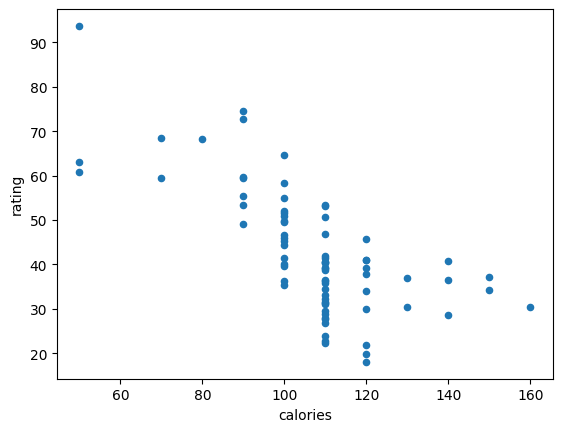

In [29]:
# 칼로리와 소비자 평점 간의 산점도를 그리시오.

cereals_df.plot.scatter(x='calories', y='rating', legend=False)

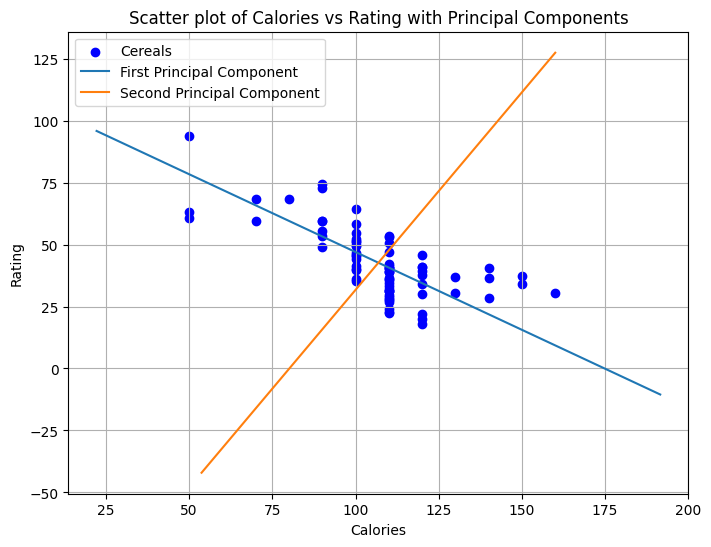

In [ ]:
import dmba
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Cereal data 불러오기
cereals_df = dmba.load_data('Cereals.csv')

# 'calories'와 'rating' 두 변수를 대상으로 PCA 수행
pca = PCA(n_components=2)
pca.fit(cereals_df[['calories', 'rating']])

# 변환된 주성분 벡터 확인
pcs = pca.components_
mean = pca.mean_

# 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(cereals_df['calories'], cereals_df['rating'], color='blue', label='Cereals')

# 첫 번째 주성분 선 그리기 (평균점에서 시작하여 주성분 방향으로 선)
pc1_start = mean - pcs[0] * 100  # 100은 적절한 크기 조절 값
pc1_end = mean + pcs[0] * 100
plt.plot([pc1_start[0], pc1_end[0]], [pc1_start[1], pc1_end[1]], label='First Principal Component')

# 두 번째 주성분 선 그리기
pc2_start = mean - pcs[1] * 100
pc2_end = mean + pcs[1] * 100
plt.plot([pc2_start[0], pc2_end[0]], [pc2_start[1], pc2_end[1]], label='Second Principal Component')

# 축 라벨 및 제목
plt.xlabel('Calories')
plt.ylabel('Rating')
plt.title('Scatter plot of Calories vs Rating with Principal Components')
plt.legend()
plt.grid(True)
plt.show()



- 데이터의 변동성이 가장 큰 방향으로 직선 z1이 나타남(1차 주성분 직선과 점들 간의 수직선 거리 제곱합을 최소화하는 선)

- z1과 직교를 이루는 선 중에서 가장 변동성이 가장 큰 z2를 찾음.

이러한 과정을 통해 변동성을 재분배하게 됨.





:주성분의 중요성은 **설명된 분산(explained variance)**을 통해 평가

원래 자료를 2개의 새로운 방향으로 투영하는 데 사용되는 가중치를 제공하며,
분석을 통해 획득된 분산 비율은 재조정된 값 Z1은 86%, z2는 14%

그러므로 Z2를 제외한다고 해도 총변동은 86.32%를 여전히 유지할 수 있다.

PC1의 설명력 0.8632 / PC@의 설명력 ~
더해서 100~

In [30]:
# 주성분 분석(PCA) 결과를 요약하는 데이터프레임을 생성하는 작업을 수행
# 여기에는 주성분의 표준 편차, 분산 설명 비율, 누적 설명 비율이 포함

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})

pcsSummary = pcsSummary.transpose() #데이터프레임을 전치하여 행과 열을 바꿉
pcsSummary.columns = ['PC1', 'PC2']

pcsSummary.round(4)

,PC1,PC2
Standard deviation,22.3165,8.8844
Proportion of variance,0.8632,0.1368
Cumulative proportion,0.8632,1.0000


In [31]:
cereals_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


pcs의 components_ 필드는 주성분 분석(PCA)에서 추출된 개별 주성분을 제공.

이 행렬의 열은 **주성분 PC1, PC2**등을 나타내며, 행은 입력 행렬에서 발견된 순서대로 변수를 나타냄. 이 경우, 변수는 'calories'와 'rating'

아래 결과를 이용해서 주성분 점수를 추출하는 데 사용
주성분 점수를 만드는데 **가중치**역할을 수행

- 아래 결과를 이용해서 주성분 점수를 추출하는데 사용
- 주성분 점수를 만드는데

### 로딩 값- 가중치 역할
pis의 componentg_필드는 주성분 분석(PCA)에서 주출된제별 주성분을 제공 이 병렬의 열은 "주성분 PC1, PC2 동을 나타내며, 영은 입력 평영에서 견된 순서대로 번수 나타냄, 이 경우, 변수는 'Clories'와 ‘rating’

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=['PC1', 'PC2'],
                                index=['calories', 'rating'])
pcsComponents_df

,PC1,PC2
calories,-0.847053,0.531508
rating,0.531508,0.847053


### 주성분 점수로 변환

PCA 모델을 사용하여 데어터클 주성분 정수로 변하고, 그 결과를 데이터프레임 scoree에 저장
-  주성분 정수의 의미 설명
 -  첫번째 열 가중치 (0.847, 0.592)
 -  두번째 열 가중치 (0 532,0.847)
 - 100%8rain시리염의 로리 값은 70. 평점은 68.4로 주어져 있음
 - 77개 시리엄 말리의 평균 온 믹스트 106.88, 평점 평균 42.6

Use the `transform` method to get the scores.
PCA 모델을 사용하여 데이터를 **주성분 점수로 변환**하고, 그 결과를 데이터프레임 scores에 저장


0 주성분 점수의 의미 설명
- 첫번째 열 가중치 (-0.847, 0.532)
- 두번째 열 가중치 (0.532, 0.847)

- 100%Brain시리얼의 칼로리 값은 70, 평점은 68.4로 주어져 있음.
- 77개 시리얼 칼로리의 평균 106.88, 평점 평균 42.67

- 이에 대한 첫 번재 주성분 점수 44.92 (-0.847)(70-106.88)+(0.532)(68.4-42.67)

- 새롭게 생성된 **z1, z2 는 원래 변수에서 평균을 뺀 값들이기 대문에 평균은 0**이 된다.

- PC1 분산은 498, PC2는 79 PC1의 변동 값이 86%로 나타남.


이 주성분은 데이터 대부분의 **변동**을 담고 있기 때문에 원래 데이터의 두 변수를 대표하는 하나의 변수로 첫 번째 PC1 주성분 점수를 사용하는 것이 합리적으로 보인다.


In [34]:
# PCA 적용: 'calories'와 'rating' 변수만 사용
pca = PCA(n_components=2)  # PCA 객체를 생성
pca.fit(cereals_df[['calories', 'rating']])  # PCA 학습

# PCA로 변환된 데이터를 DataFrame으로 변환
scores = pd.DataFrame(pca.transform(cereals_df[['calories', 'rating']]),
                      columns=['PC1', 'PC2'])

# 결과 출력
scores.head()

,PC1,PC2
0,-44.921528,2.197183
1,15.725265,-0.382416
2,-40.149935,-5.407212
3,-75.310772,12.999126
4,7.041508,-5.357686


In [35]:
scores.describe().round(3) #평균 값이 0임을 확인

,PC1,PC2
count,77.000,77.000
mean,0.000,0.000
std,22.316,8.884
min,-75.311,-15.512
25%,-9.616,-6.383
50%,3.844,-0.262
75%,11.988,5.491
max,51.558,18.234


In [36]:
scores.corr().round(2) # 새롭게 만들어진 변수들 간에 상관관계 0임을 확인

,PC1,PC2
PC1,1.0,0.0
PC2,0.0,1.0


In [ ]:
# PC1과 PC2 간의 상관계수 계산
correlation = scores['PC1'].corr(scores['PC2'])
print(f"PC1과 PC2 간의 상관계수: {correlation}")


PC1과 PC2 간의 상관계수: 3.0884982563732068e-15


## 시리얼 데이터 PCA 실습


table4.11
전체 테이블을 대상으로 첫번째부터 세번쨰 까지의 비숫자열들을 무시하고 주성분 분석을 시행

전체 데이터의 누적분산 비율

In [37]:
pcs = PCA()

pcs.fit(cereals_df.iloc[:, 3:].dropna(axis=0))

# cereals_df 데이터프레임에서 첫 번째부터 세 번째 열을 무시하기 위해 .iloc[:, 3:]를 사용하여 해당 열을 선택
# dropna(axis=0)를 사용하여 누락된 값이 있는 행을 삭제

pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
# 열 이름을 'PC1', 'PC2', 'PC3', ...과 같은 형식으로 변경합니다. 이는 각 주성분을 나타내는 열 이름을 부여하기 위함

pcsSummary_df.round(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,83.764,70.914,22.644,19.181,8.423,2.092,1.699,0.78,0.658,0.37,0.186,0.063,0.0
Proportion of variance,0.540,0.387,0.039,0.028,0.005,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.0
Cumulative proportion,0.540,0.926,0.966,0.994,0.999,1.000,1.000,1.00,1.000,1.00,1.000,1.000,1.0


- pc1 사용시 : 54%
- pc2까지 사용시 : 92%
- pc3까지 사용시 : 96%

In [38]:
# 주성분 분석(PCA) 결과에서 주성분에 해당하는 로딩(loading) 값을 추출하고, 이 값을 데이터프레임으로 정리하는 작업을 수행

pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns,
                                index=cereals_df.iloc[:, 3:].columns)

# pcs.components_는 주성분에 해당하는 로딩(loading) 값을 포함하는 배열.
# .transpose()를 사용하여 이 배열을 전치하여 주성분을 열로, 변수를 행으로 나타내는 데이터프레임을 생성.
#주성분을 열 이름으로 지정하고, 변수를 행 이름으로 지정하여 pcsComponents_df 데이터프레임을 생성

pcsComponents_df.iloc[:,:5] # 상위 5개의 주성분만 보여주기

,PC1,PC2,PC3,PC4,PC5
calories,0.077984,-0.009312,0.629206,-0.601021,0.454959
protein,-0.000757,0.008801,0.001026,0.003200,0.056176
fat,-0.000102,0.002699,0.016196,-0.025262,-0.016098
sodium,0.980215,0.140896,-0.135902,-0.000968,0.013948
fiber,-0.005413,0.030681,-0.018191,0.020472,0.013605
carbo,0.017246,-0.016783,0.017370,0.025948,0.349267
sugars,0.002989,-0.000253,0.097705,-0.115481,-0.299066
potass,-0.134900,0.986562,0.036782,-0.042176,-0.047151
vitamins,0.094293,0.016729,0.691978,0.714118,-0.037009
shelf,-0.001541,0.004360,0.012489,0.005647,-0.007876


**원래 변수가 서로 다른 주성분에 어떻게 기여하는지 가중치를 검토 ****함으로 이루어진다. **

PC1 첫번째 주성분에서 나트륨이** -0.980215 **지배적임. 가장 높은 가중치를 가지는 것임.

## 데이터 정규화 / Table 4.12

PCA를 진행하기 전에 **데이터를 표준화(standardize)**하기 위해 scikit-learn의 전처리(preprocessing) 기능을 사용합니다. 이것은 **데이터의 스케일을 조정하여 PCA 분석에 미치는 영향을 줄일 수 있음**

정규화(표준화)는 각각의 원래 변수를 분산이 1인 표준화된 변수로 대체하는 것,
정규화하려면 각 변수를 각가그이 표준편차로 나누기만 하면 된다.

이것은 변동의 관점에서 모든 변수에 동등한 중요성을 부여.

- 정규화 후에는 공분산이 아닌 상관행렬을 이용해 PCA 를 수행.

PCA를 진행하기 전에 데이터를 표준화하기 위해 scikit-learn의 전처리(preprocessing) 기능을 사용

In [39]:
pcs = PCA()
scores2=preprocessing.scale(cereals_df.iloc[:, 3:].dropna(axis=0)) # preprocessing.scale 데이터 정규화
# dropna(axis=0): 선택된 특성 열 중에서 누락된 데이터(결측치)가 있는 행을 삭제, axis=0은 행을 기준으로 삭제한다는 의미

pcs.fit(scores2)

pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,1.9192,1.7864,1.3912,1.0166,1.0015,0.8555,0.8251,0.6496,0.5658,0.3051,0.2537,0.1399,0.0
Proportion of variance,0.2795,0.2422,0.1469,0.0784,0.0761,0.0555,0.0517,0.0320,0.0243,0.0071,0.0049,0.0015,0.0
Cumulative proportion,0.2795,0.5217,0.6685,0.7470,0.8231,0.8786,0.9303,0.9623,0.9866,0.9936,0.9985,1.0000,1.0


In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns,
                                index=cereals_df.iloc[:, 3:].columns)
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
calories,-0.299542,-0.393148,0.114857,-0.204359,0.203899
protein,0.307356,-0.165323,0.277282,-0.300743,0.319749
fat,-0.039915,-0.345724,-0.204890,-0.186833,0.586893
sodium,-0.183397,-0.137221,0.389431,-0.120337,-0.338364
fiber,0.453490,-0.179812,0.069766,-0.039174,-0.255119
carbo,-0.192449,0.149448,0.562452,-0.087835,0.182743
sugars,-0.228068,-0.351434,-0.355405,0.022707,-0.314872
potass,0.401964,-0.300544,0.067620,-0.090878,-0.148360
vitamins,-0.115980,-0.172909,0.387859,0.604111,-0.049287
shelf,0.171263,-0.265050,-0.001531,0.638879,0.329101


PCA를 통해 새롭게 산출된 값에 대한 주성분 점수 생성하기
정규화 할때 단위가 달라서 편차가 크다~
표준화의 결과는? => 모두 분산이 1이되도록 해야한다.
- 주성분 상관관계의 의미.


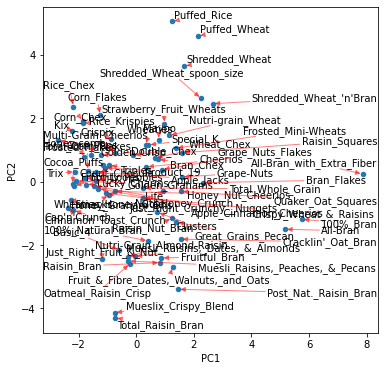

In [ ]:
from adjustText import adjust_text
cereals_red_df = cereals_df.dropna(axis=0)
cereals_red_df = cereals_red_df.reset_index(drop=True)

scores = pd.DataFrame(pcs.fit_transform(preprocessing.scale(cereals_red_df.iloc[:, 3:].dropna(axis=0))),
                      columns=[f'PC{i}' for i in range(1, 14)])
cereals_pca_df = pd.concat([cereals_red_df['name'].dropna(axis=0), scores[['PC1', 'PC2']]], axis=1)
ax = cereals_pca_df.plot.scatter(x='PC1', y='PC2', figsize=(6, 6))
points = cereals_pca_df[['PC1','PC2','name']]

texts = []
for _, (x, y, s) in points.iterrows():
        texts.append(ax.text(x, y, s))
adjust_text(texts, force_text=0.05, arrowprops=dict(arrowstyle="-|>", color='r', alpha=0.5))

plt.show()

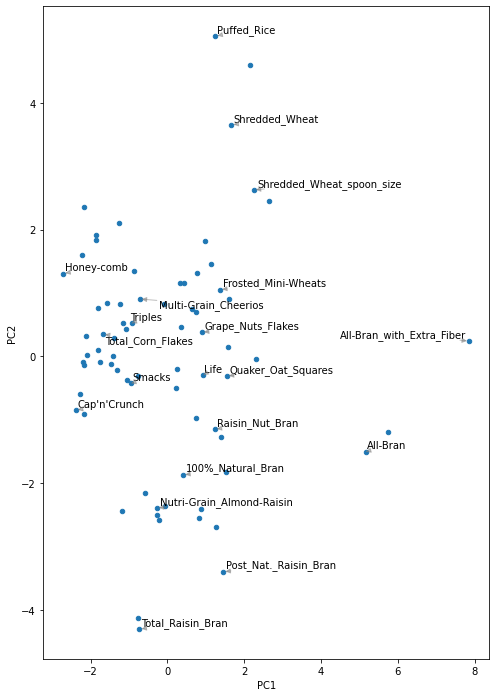

In [ ]:
from sklearn.cluster import KMeans

cereals_pca_df = pd.concat([cereals_df['name'], scores], axis=1) #ignore_index=True)
ax = cereals_pca_df.plot.scatter(x='PC1', y='PC2', figsize=(8, 12))
points = pd.DataFrame(points)

def extractPoint(df, texts):
    for _, (x, y, s) in df.sample(1)[['PC1','PC2','name']].iterrows():
        texts.append(ax.text(x, y, s))

kmeans = KMeans(n_clusters=20, random_state=0).fit(points[['PC1', 'PC2']])
points['cluster'] = kmeans.labels_
texts = []
points.groupby(['cluster']).apply(lambda g: extractPoint(g, texts))

adjust_text(texts, force_text=0.05, arrowprops=dict(arrowstyle="-|>", color='grey', alpha=0.5))
plt.show()

## 와인데이터로 주성분 분석하기

[ pca 분석 결과 ]
- **Standard deviation**
: 각 주성분의 표준 편차로, explained_variance_의 제곱근을 계산하여 얻습니다. 이는 주성분의 변동성을 나타냅니다.
- **Proportion of variance**
: 각 주성분이 전체 변동성에서 차지하는 비율로, explained_variance_ratio_에서 가져옵니다. 이 값은 각 주성분의 중요도를 나타냅니다.
- **Cumulative proportion**
: 각 주성분까지의 누적 변동성 비율로, np.cumsum() 함수를 사용하여 계산합니다. 이 값은 특정 주성분까지 설명되는 전체 변동성의 비율을 보여줍니다.

In [40]:
wine_df = dmba.load_data('Wine.csv')
wine_df = wine_df.drop(columns=['Type']) ##데이터프레임에서 'Type'이라는 열(column)을 제거

[ 정규화 수행 후, 주성분분석(PCA)진행 ]

**1. 데이터의 스케일 차이**
: 데이터의 범위가 크게 차이 나는 경우,
거 큰 값의 변수가 주성분 분석에 더 큰 영향을 미치게 된다.
- 단위차이
- 스케일 불균형

**2. 평균과 분산의 중요성**
- 표준화
- 정규분포

**3. 결과 해석 용이성**


### 1.데이터 정규화

In [47]:
# 1. 데이터 정규화 (표준화)
scaler = StandardScaler()
wine_df_scaled = scaler.fit_transform(wine_df.dropna(axis=0))  # 결측값 제거 후 정규화

# 2. PCA 수행
pcs = PCA()
pcs.fit(wine_df_scaled)

# 3. PCA 요약 데이터프레임 생성
pcsSummary_df = pd.DataFrame({
    'Standard deviation': np.sqrt(pcs.explained_variance_),  # 주성분의 표준편차
    'Proportion of variance': pcs.explained_variance_ratio_,  # 각 주성분의 변동성 비율
    'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)  # 누적 변동성 비율
})

# 데이터프레임 형태 변환
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

# 4. 주성분 로딩 데이터프레임 생성
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns,
                                index=wine_df.columns)

# 주성분 로딩의 첫 5개 열 출력
pcsComponents_df.iloc[:, :5]

,PC1,PC2,PC3,PC4,PC5
Alcohol,0.144329,0.483652,-0.207383,-0.017856,-0.265664
Malic_Acid,-0.245188,0.224931,0.089013,0.536890,0.035214
Ash,-0.002051,0.316069,0.626224,-0.214176,-0.143025
Ash_Alcalinity,-0.239320,-0.010591,0.612080,0.060859,0.066103
Magnesium,0.141992,0.299634,0.130757,-0.351797,0.727049
Total_Phenols,0.394661,0.065040,0.146179,0.198068,-0.149318
Flavanoids,0.422934,-0.003360,0.150682,0.152295,-0.109026
Nonflavanoid_Phenols,-0.298533,0.028779,0.170368,-0.203301,-0.500703
Proanthocyanins,0.313429,0.039302,0.149454,0.399057,0.136860
Color_Intensity,-0.088617,0.529996,-0.137306,0.065926,-0.076437


### 2.주성분 점수 출력

In [62]:
# 주성분 점수 계산
scores = pcs.transform(wine_df_scaled)

# DataFrame으로 변환, 동적으로 주성분 수 설정
num_components = scores.shape[1]  # 주성분 수
scores_df = pd.DataFrame(scores, columns=['PC{}'.format(i + 1) for i in range(num_components)])

# 주성분 점수 표 출력
scores_df.head(5)  # 상위 5개 행 출력



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366,-0.525945,-0.216664,-0.079364


### 3.주성분 시각화

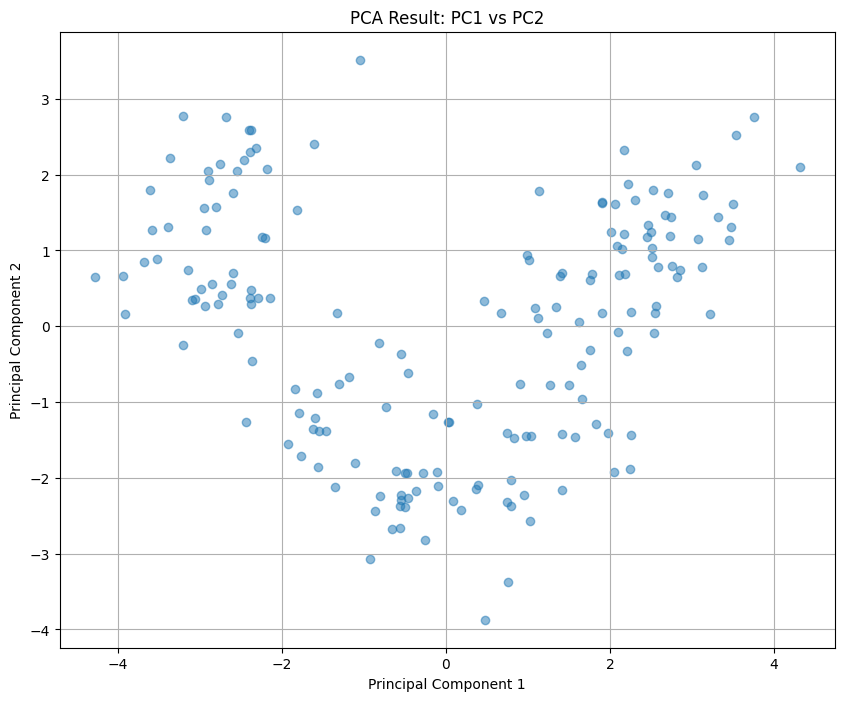

In [53]:

# 주성분 점수 시각화
plt.figure(figsize=(10, 8))
plt.scatter(scores_df['PC1'], scores_df['PC2'], alpha=0.5)
plt.title('PCA Result: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


#### [ kmeans를 사용한 주성분 점수 시각화 ]


1. **K-평균 군집화**: KMeans를 사용하여 주성분 점수(scores_df)를 기반으로 20개의 클러스터를 생성합니다. 생성된 클러스터 레이블은 scores_df['cluster']에 저장됩니다.

2. **산점도 생성**: 주성분 1(PC1)과 주성분 2(PC2)를 x축과 y축으로 사용하여 산점도를 그립니다. 각 점의 색상은 클러스터에 따라 다릅니다.

3. **클러스터 중심 시각화**: 각 클러스터의 중심을 빨간색 'X' 마커로 표시합니다.

4. **텍스트 레이블 추가**: 각 데이터 포인트에 인덱스 레이블을 추가하여, 어떤 데이터 포인트인지 시각적으로 확인할 수 있습니다. 레이블이 많으면 시각적으로 복잡해질 수 있으니 필요에 따라 추가하실 수 있습니다.

5. **그래프 설정**: 그래프 제목, x축 및 y축 레이블, 범례를 추가하고 그리드선을 추가하여 가독성을 높입니다.

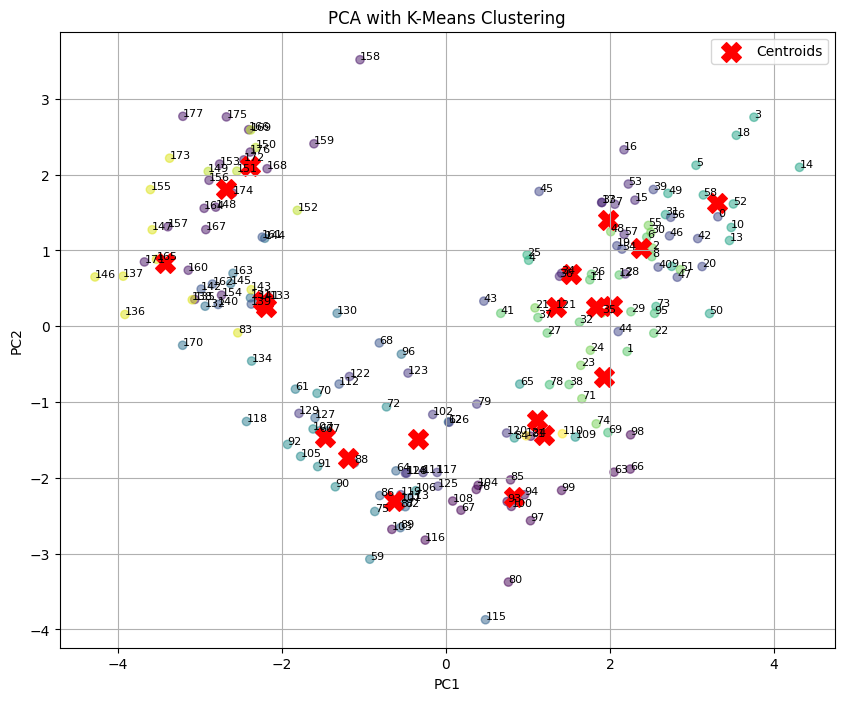

In [64]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. K-평균 군집화 수행 (20개 클러스터)
kmeans = KMeans(n_clusters=20, random_state=0).fit(scores_df)
scores_df['cluster'] = kmeans.labels_

# 2. 산점도 생성
plt.figure(figsize=(10, 8))
plt.scatter(scores_df['PC1'], scores_df['PC2'], c=scores_df['cluster'], cmap='viridis', alpha=0.5)

# 3. 클러스터 중심 시각화
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

# 4. 텍스트 레이블 추가 (선택 사항)
for i, txt in enumerate(scores_df.index):
    plt.annotate(txt, (scores_df['PC1'].iloc[i], scores_df['PC2'].iloc[i]), fontsize=8)

# 5. 그래프 설정
plt.title('PCA with K-Means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()


#### [ 주성분 로딩 시각화 ]

: 각 주성분이 원본 변수에 어떻게 기여하는지를 나타냄, 각 원본 변수의 로딩 값이 클수록 해당 변수가 주성분에 더 큰 영향을 미침

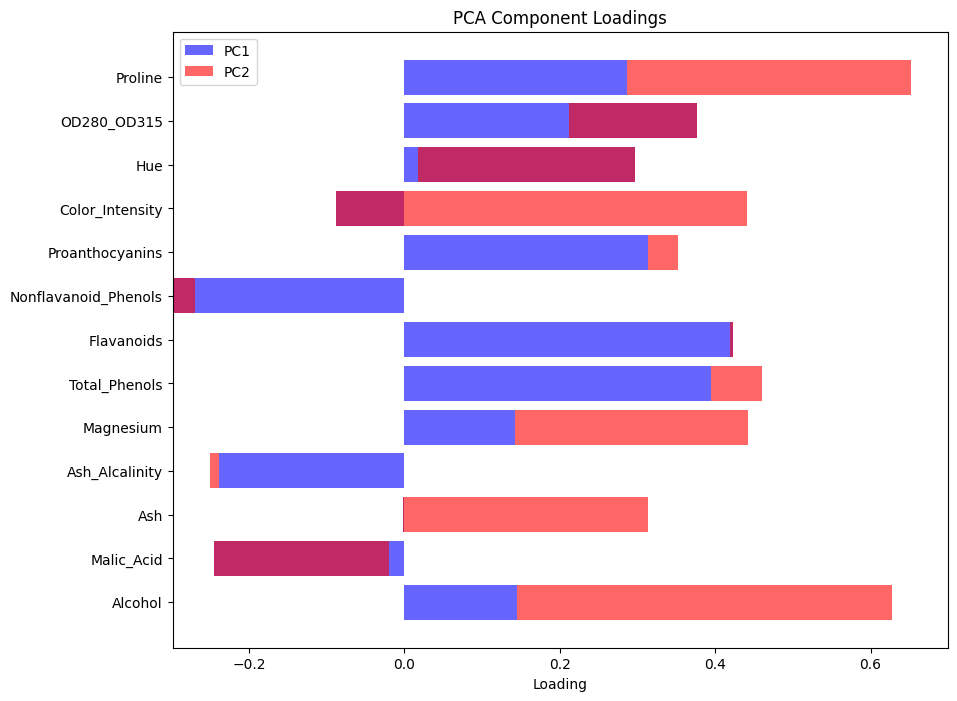

In [54]:
# 주성분 로딩 시각화
plt.figure(figsize=(10, 8))
plt.barh(pcsComponents_df.index, pcsComponents_df['PC1'], color='b', alpha=0.6, label='PC1')
plt.barh(pcsComponents_df.index, pcsComponents_df['PC2'], color='r', alpha=0.6, label='PC2', left=pcsComponents_df['PC1'])
plt.title('PCA Component Loadings')
plt.xlabel('Loading')
plt.legend()
plt.show()


#### [ 주성분 분석 3D 시각화 ]


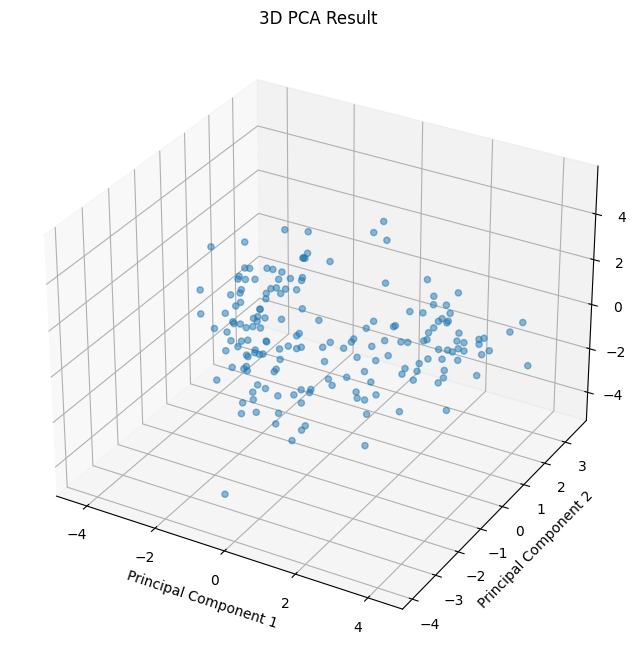

In [57]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scores_df['PC1'], scores_df['PC2'], scores[:, 2], alpha=0.5)
ax.set_title('3D PCA Result')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()
